<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

# Python for Finance Course

**Module 2 &mdash; Backtesting**

[team@tpq.io](mailto:team@tpq.io) | [http://tpq.io](http://tpq.io)

The Python Quants GmbH

## Requirements

Make sure to have installed locally a **comprehensive Python installation** like the [Anaconda](http://continuum.io/downloads) Python distribution.

Alternatively, and more easily, register on the **[Quant Platform](http://pqp.io)** where you can execute this Jupyter Notebook file in the browser. After registration, you find all Jupyter Notebook files of this course in the folder `pffcourse`.

## Necessary Imports

As you know by now, working with Python in general requires you to **import certain modules/packages** from the standard library or from the so-called scientific or PyData stack (i.e. from third parties).

In [1]:
import numpy as np  # array operations
import pandas as pd  # time series management
from pandas_datareader import data as web  # data retrieval
import matplotlib.pyplot as plt  # standard plotting library
import seaborn as sns; sns.set()  # nicer plotting style
# put all plots in the notebook itself
%matplotlib inline

## Retrieving Index Level Data

Remember from the first module how we retrieve **data from Yahoo! Finance**. For this module, we work with data for the **S&P 500 stock index**.

In [2]:
SPX = web.DataReader('^GSPC', data_source='yahoo', start='2005-1-1')

In [3]:
SPX.tail()  # the final five rows

,Open,High,Low,Close,Volume,Adj Close
Date,,,,,,
2016-12-08,2241.129883,2251.689941,2237.570068,2246.189941,4200580000,2246.189941
2016-12-09,2249.729980,2259.800049,2249.229980,2259.530029,3884480000,2259.530029
2016-12-12,2258.830078,2264.030029,2252.370117,2256.959961,4034510000,2256.959961
2016-12-13,2263.320068,2277.530029,2263.320068,2271.719971,3857590000,2271.719971
2016-12-14,2268.350098,2276.199951,2248.439941,2253.280029,4406970000,2253.280029


## Generating Trading Signals

We want to implement a **trading strategy based on simple moving averages (SMA)**. We work with two SMAs:

* short-term SMA over 42 days (SMA42)
* long-term SMA over 252 days (SMA252)

We distinguish two constellations:

* SMA42 > SMA252: buy signal, being **long** the market
* SMA42 < SMA252: sell signal, being **short** the market

We calculate the two SMAs as follows.

In [4]:
SPX['SMA42'] = SPX['Adj Close'].rolling(window=42).mean()
SPX['SMA252'] = SPX['Adj Close'].rolling(window=252).mean()
SPX.dropna(inplace=True)  # drop rows with NaN values

In graphical terms, we want to be **long the market whenever the SMA42 line is above the SMA252 line** and vice versa.

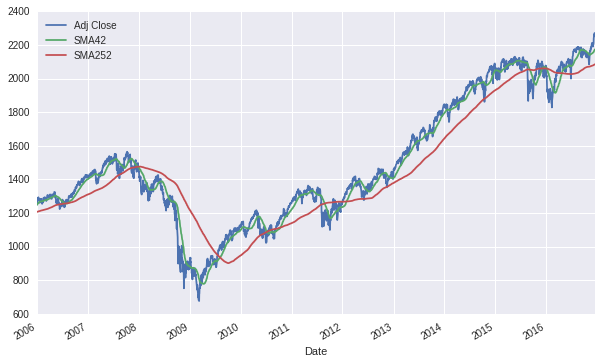

In [5]:
SPX[['Adj Close', 'SMA42', 'SMA252']].plot(figsize=(10, 6));

This need to be formalized for the calculations to come. We represent **"being long the market" by 1** and **"being short the market" by -1**.

In [6]:
# vectorized evaluation of the trading condition/signal generation
SPX['position'] = np.where(SPX['SMA42'] > SPX['SMA252'], 1, -1)

Let us **visualize the positions** resulting from the signal. We start with a long position, do several re-positionings and end with a short position.

(-1.1, 1.1)

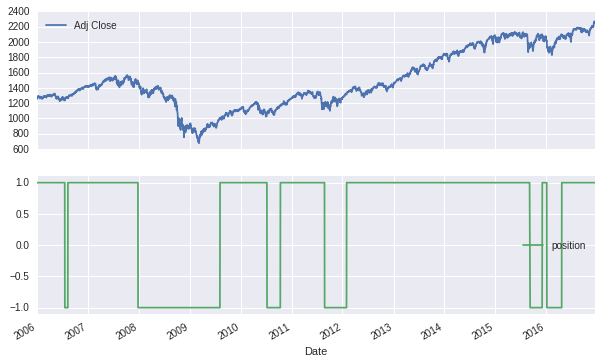

In [7]:
SPX[['Adj Close', 'position']].plot(subplots=True, figsize=(10, 6))
plt.ylim(-1.1, 1.1)  # adjust y-axis limits

## Backtesting = Judging Performance

Let us calculate the **log returns** as in the first module. These are needed to judge the performance, i.e. to backtest, our SMA-based trading strategy. We call the column `market` since these are the _market returns_.

In [8]:
# vectorized calculation of log returns
SPX['market'] = np.log(SPX['Adj Close'] / SPX['Adj Close'].shift(1))

Next, we can use the market returns to derive the **strategy returns** in vectorized fashion. Note the shift of the `position` column by one day, i.e. we have entered/maintained a position yesterday and and today's returns. It now becomes clear, why 1 represents a long position and -1 a short position: we get the market return when we are long and -1 times the market return when we are short. All this makes obviously a number of simplifying assumptions (e.g. no transaction costs).

In [9]:
# vectorized calculation of strategy returns
SPX['strategy'] = SPX['position'].shift(1) * SPX['market']

Next, let us calculate the **cumulative returns** of the market vs. the trading strategy. This is straightforward since we work with log returns. We first calculate the cumulative sums (`cumsum`) and the apply the exponential function (`np.exp`) to the respective time series.

In [10]:
SPX[['market', 'strategy']].cumsum().apply(np.exp).tail()

,market,strategy
Date,,
2016-12-08,1.799413,2.072519
2016-12-09,1.810100,2.084827
2016-12-12,1.808041,2.082456
2016-12-13,1.819865,2.096075
2016-12-14,1.805093,2.079060


And the **cumulative market vs. strategy returns** visualized. As the numbers and the plot suggest, the strategy in this case **outperforms** the market by a considerable margin.

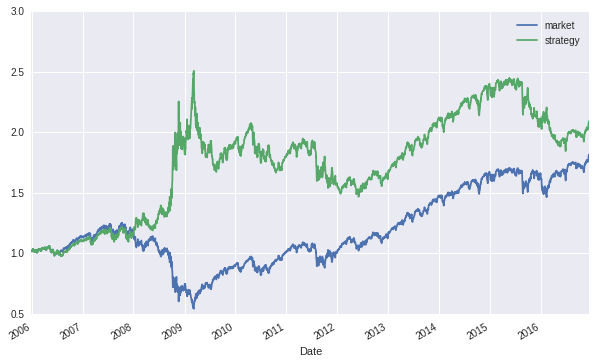

In [11]:
SPX[['market', 'strategy']].cumsum().apply(np.exp).plot(figsize=(10, 6));

## Risk and Return

Final consideration: what about the relation between **risk & return**? Let us quickly do the math. The **annualized return** of the strategy is obviously higher that from the market ...

In [12]:
arets = SPX[['market', 'strategy']].mean() * 252  # annualized returns
arets

market      0.053965
strategy    0.066876
dtype: float64

... while the **annualized volatility** is more or less the same. The higher returns do not lead to higher risk in this case.

In [13]:
astds = SPX[['market', 'strategy']].std() * 252 ** 0.5  # annualized volatility
astds

market      0.202404
strategy    0.202389
dtype: float64

## Closing Remarks

This finishes the second module of the Python for Finance email course. In this module, you have learned:

* how to generate trading signals (market positionings) in vectorized fashion
* how to backtest a formalized strategy based on the market log returns in vectorized fashion
* how to calculate and visualize the cumulative returns of trading strategies
* how to calculate annualized returns and volatilities for trading strategies

These are fundamentally important concepts in systematic (algorithmic) trading.

## Exercises

In order to master the material of this module, do the following:

* replace the S&P 500 index by another symbol, eg. `MSFT`, `YHOO`, `^GDAXI`
* work with different SMA values, e.g. 20 and 100
* implement an optimization procedure to come up with optimal SMA values
* implement a backtesting procedure which distinguishes in-sample (training) from out-of-sample (test) data sets
* formalize other trading strategies based on other metrics
* install a dedicated backtesting library like [PyAlgoTrade](http://gbeced.github.io/pyalgotrade/) or [zipline](https://github.com/quantopian/zipline) and do the tutorials

## References 

You find background information for the topics covered in this module in the following book:

* Hilpisch, Yves (2014): _Python for Finance_. O'Reilly, ch. 6.

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">team@tpq.io</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance** |
<a href="http://python-for-finance.com" target="_blank">Python for Finance @ O'Reilly</a>

**Derivatives Analytics with Python** |
<a href="http://derivatives-analytics-with-python.com" target="_blank">Derivatives Analytics @ Wiley Finance</a>

**Listed Volatility and Variance Derivatives** |
<a href="http://lvvd.tpq.io" target="_blank">Listed VV Derivatives @ Wiley Finance</a>